# **User Analytics in the Telecommunication Industry - Overview**


# **Data Acquisation**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset
data=pd.read_csv('/content/telcom_data (1).csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
#check the shape of the data
data.shape

(5681, 55)

# **Data Cleaning**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 5663 non-null   float64
 1   Start                                     5681 non-null   object 
 2   Start ms                                  5680 non-null   float64
 3   End                                       5680 non-null   object 
 4   End ms                                    5680 non-null   float64
 5   Dur. (ms)                                 5680 non-null   float64
 6   IMSI                                      5665 non-null   float64
 7   MSISDN/Number                             5651 non-null   float64
 8   IMEI                                      5665 non-null   float64
 9   Last Location Name                        5662 non-null   object 
 10  Avg RTT DL (ms)                     

In [6]:
#summary of statistics
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,5.663000e+03,5680.000000,5680.000000,5.680000e+03,5.665000e+03,5.651000e+03,5.665000e+03,5217.000000,5219.000000,5680.000000,...,5.680000e+03,5.680000e+03,5.680000e+03,5.680000e+03,5.680000e+03,5.680000e+03,5.680000e+03,5.680000e+03,5.680000e+03,5.680000e+03
mean,1.048048e+19,497.344366,500.009155,8.890636e+04,2.082017e+14,3.367694e+10,5.939733e+13,112.171746,24.548573,25761.787148,...,1.165368e+07,1.083747e+07,1.147591e+07,1.082705e+07,4.179669e+08,8.168704e+06,4.237219e+08,8.365895e+06,4.076557e+07,4.504623e+08
std,2.886287e+18,287.678061,288.844658,7.524291e+04,1.359318e+09,4.336367e+07,2.563016e+13,499.367417,91.528880,29052.750649,...,6.771890e+06,6.338012e+06,6.685513e+06,6.292584e+06,2.426969e+08,4.799404e+06,2.395957e+08,4.807667e+06,1.112737e+07,2.427563e+08
min,6.917540e+18,0.000000,0.000000,4.609700e+04,2.082000e+14,3.360115e+10,1.264600e+12,12.000000,0.000000,0.000000,...,1.224000e+03,1.050000e+02,1.136000e+03,2.430000e+02,2.140320e+05,2.978000e+03,4.236660e+05,2.716000e+03,6.243519e+06,7.114041e+06
25%,7.277830e+18,249.000000,250.000000,6.411725e+04,2.082010e+14,3.365877e+10,3.554400e+13,38.000000,5.000000,62.000000,...,5.766126e+06,5.336813e+06,5.633340e+06,5.368637e+06,2.113223e+08,4.034924e+06,2.151929e+08,4.196549e+06,3.280010e+07,2.456857e+08
50%,1.304240e+19,497.000000,503.000000,8.639900e+04,2.082020e+14,3.366440e+10,3.593220e+13,55.000000,13.000000,18837.000000,...,1.160660e+07,1.072057e+07,1.135067e+07,1.059911e+07,4.194515e+08,8.102428e+06,4.286738e+08,8.361451e+06,4.069292e+07,4.504141e+08
75%,1.304240e+19,746.000000,750.000000,8.639900e+04,2.082020e+14,3.368255e+10,8.637690e+13,88.000000,28.000000,41418.250000,...,1.764417e+07,1.638195e+07,1.724832e+07,1.622288e+07,6.281466e+08,1.227449e+07,6.282411e+08,1.257338e+07,4.858119e+07,6.587915e+08
max,1.318650e+19,999.000000,999.000000,1.823652e+06,2.082100e+14,3.378991e+10,9.900120e+13,25873.000000,5279.000000,217247.000000,...,2.325829e+07,2.200935e+07,2.325783e+07,2.200921e+07,8.434419e+08,1.655607e+07,8.433458e+08,1.655549e+07,7.309782e+07,8.964337e+08


In [7]:
data.dtypes

,0
Bearer Id,float64
Start,object
Start ms,float64
End,object
End ms,float64
Dur. (ms),float64
IMSI,float64
MSISDN/Number,float64
IMEI,float64
Last Location Name,object


In [8]:
#Check all the column names of dataset
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


**Handle Missing Values**

In [9]:
data.isnull().sum()

,0
Bearer Id,18
Start,0
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,16
MSISDN/Number,30
IMEI,16
Last Location Name,19


In [10]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [11]:
#separate numerical column and categorical column
numerical_list = []
categorical_list = []

for col in data.columns:
  if data[col].dtype == "object":
    categorical_list.append(col)
  else:
    numerical_list.append(col)

In [12]:
#check duplicates
data.duplicated().sum()

0

In [13]:
numerical_list

['Bearer Id',
 'Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL 

In [14]:
categorical_list

['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [15]:
# Replace missing values with the mean of the corresponding column
data[numerical_list] = data[numerical_list].fillna(data[numerical_list].mean())

In [16]:
# Verify if there are any missing values left in numerical columns
missing_values = data[numerical_list].isnull().sum()

In [17]:
missing_values

,0
Bearer Id,0
Start ms,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Avg RTT DL (ms),0
Avg RTT UL (ms),0
Avg Bearer TP DL (kbps),0


In [18]:
# Fill missing values in categorical columns with the mode
for column in categorical_list:
    mode_value = data[column].mode()[0]  # Get the mode of the column
    data[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode

In [19]:
data[categorical_list].isnull().sum()

,0
Start,0
End,0
Last Location Name,0
Handset Manufacturer,0
Handset Type,0


In [20]:
#check the shape of data again
data.shape

(5681, 55)

# **Check for Outliers**

In [21]:
# Identify outliers using the IQR method
outliers_iqr = pd.DataFrame().T

for column in numerical_list:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    outliers_iqr = pd.concat([outliers_iqr, outliers], axis=0)

# Remove duplicates
outliers_iqr = outliers_iqr.drop_duplicates()

print(f'Number of outliers detected using IQR: {outliers_iqr.shape[0]}')

Number of outliers detected using IQR: 3823


**The detection of 79667 outliers in the dataset using the IQR method indicates a significant presence of data points that deviate substantially from the central tendency of the data.**

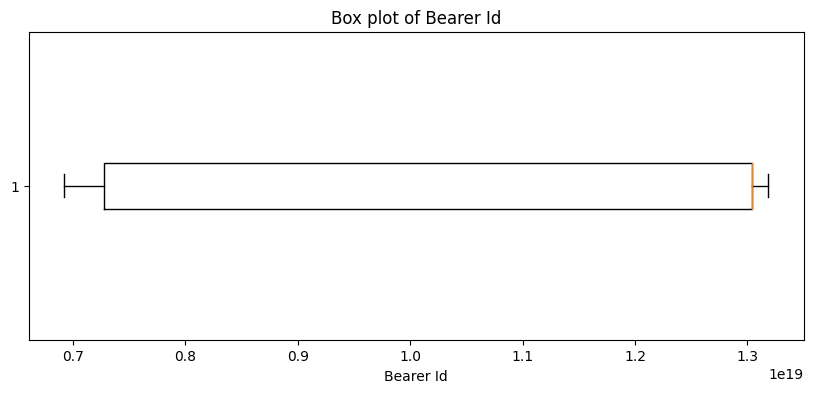

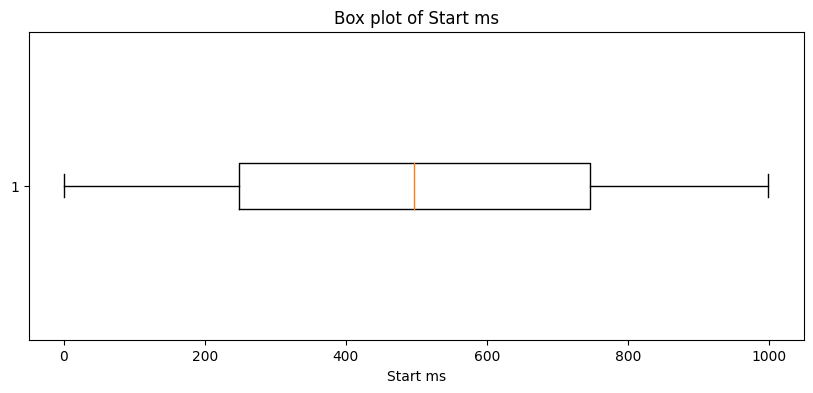

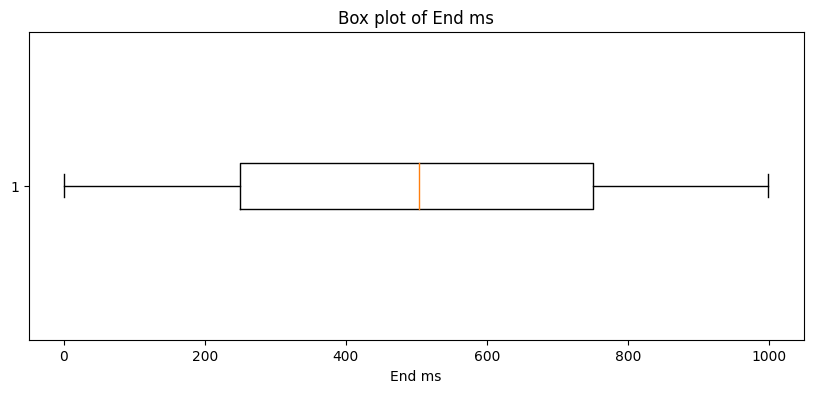

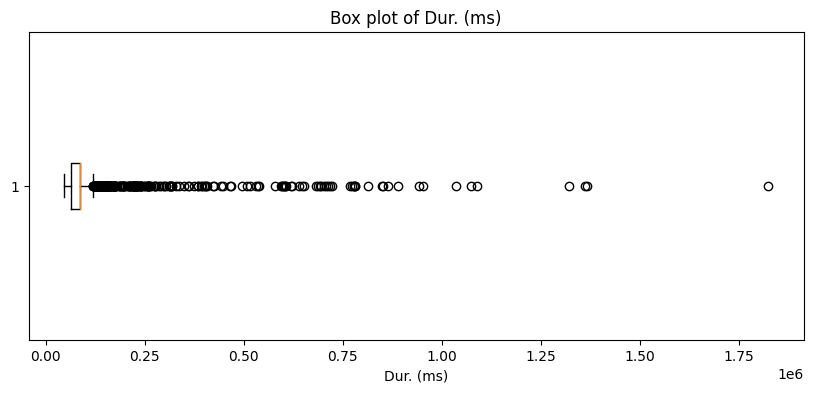

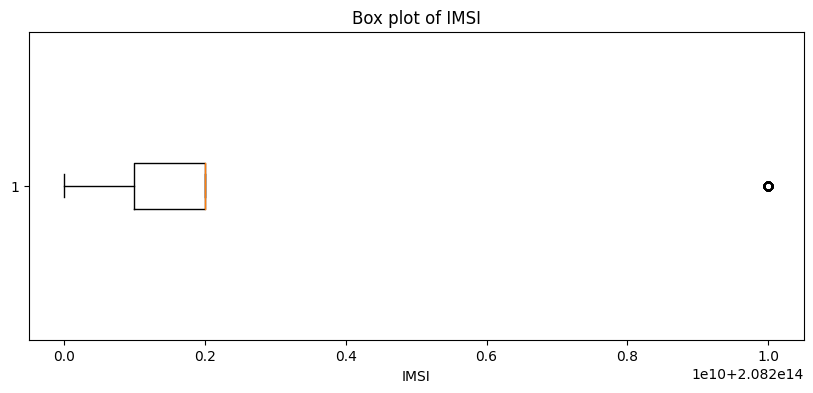

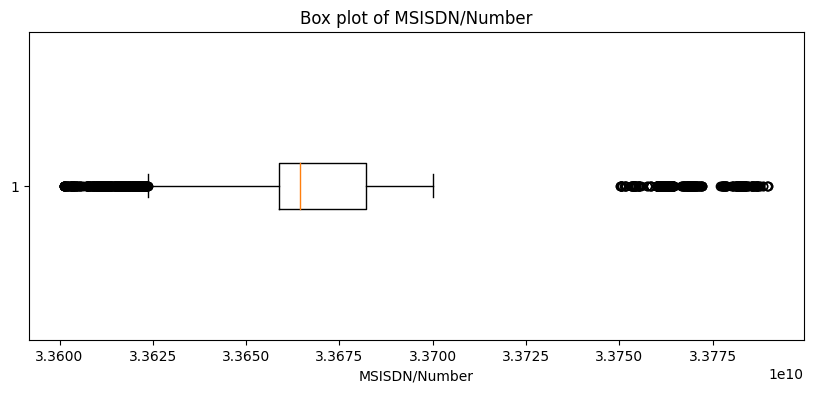

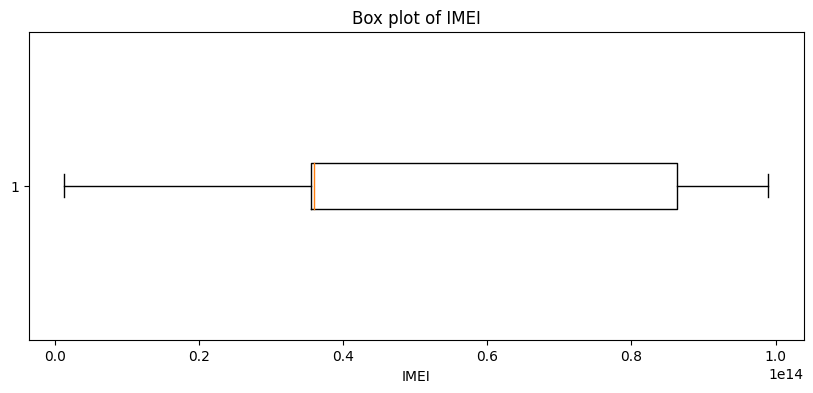

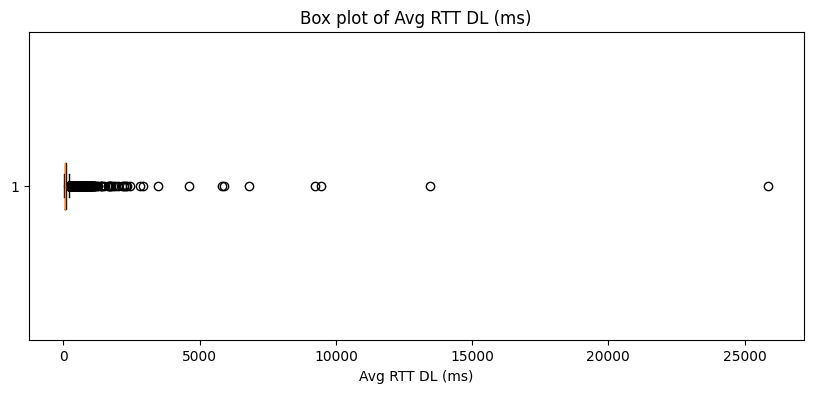

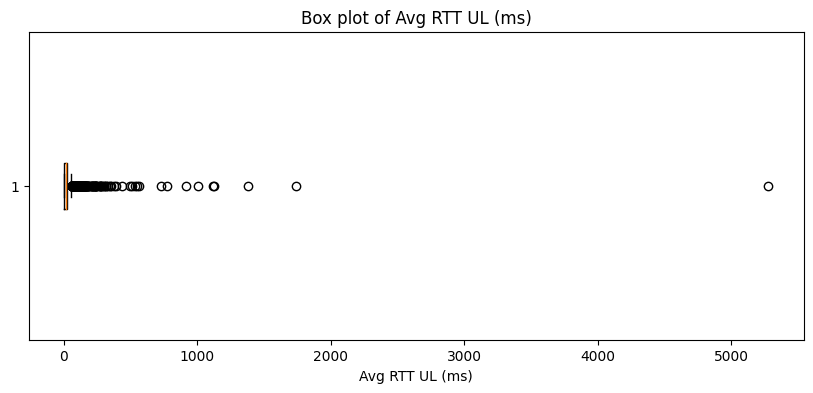

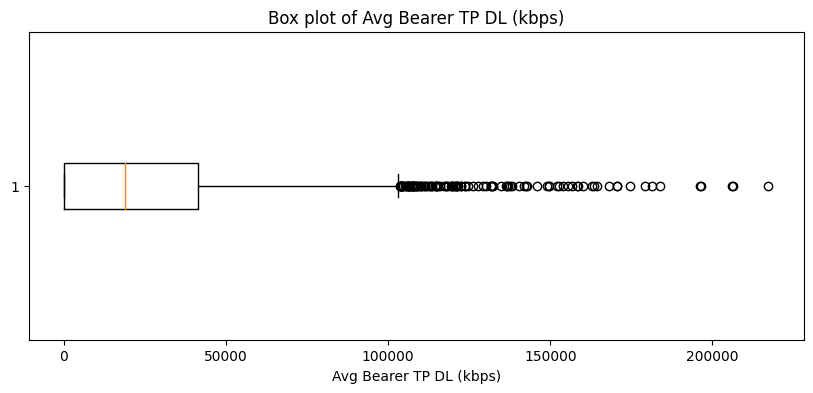

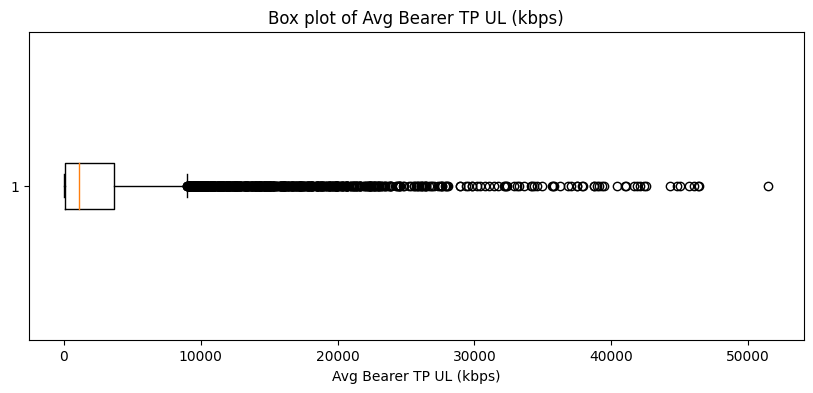

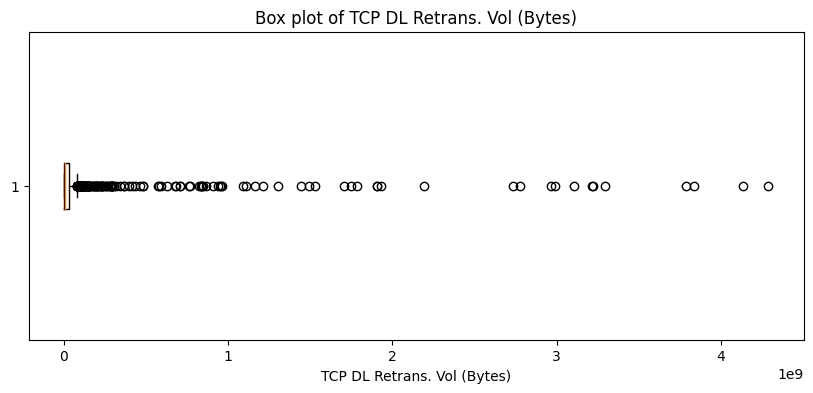

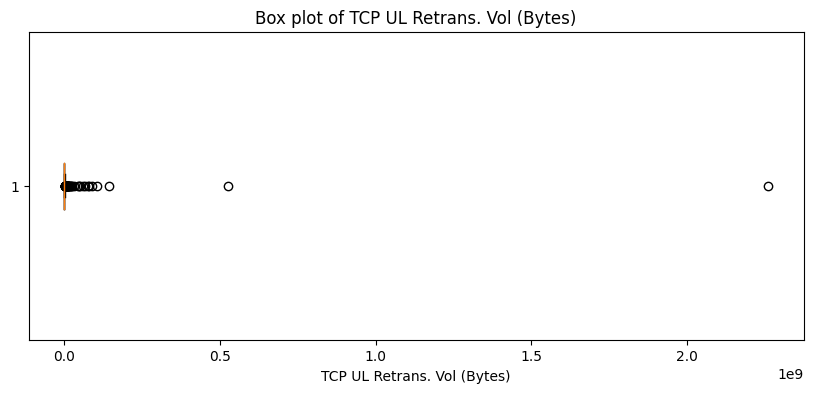

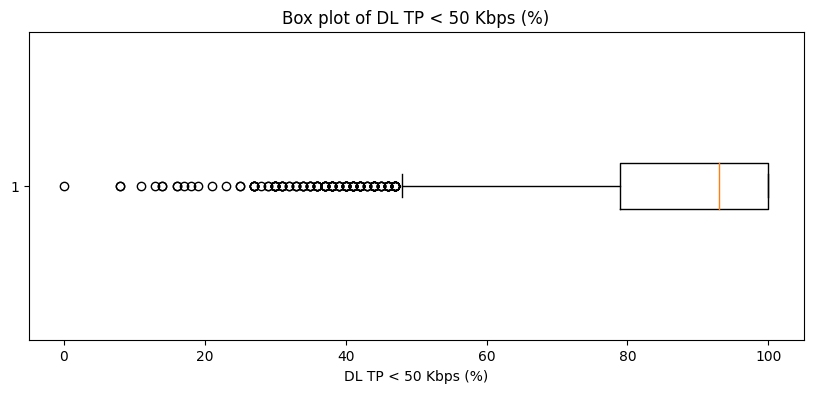

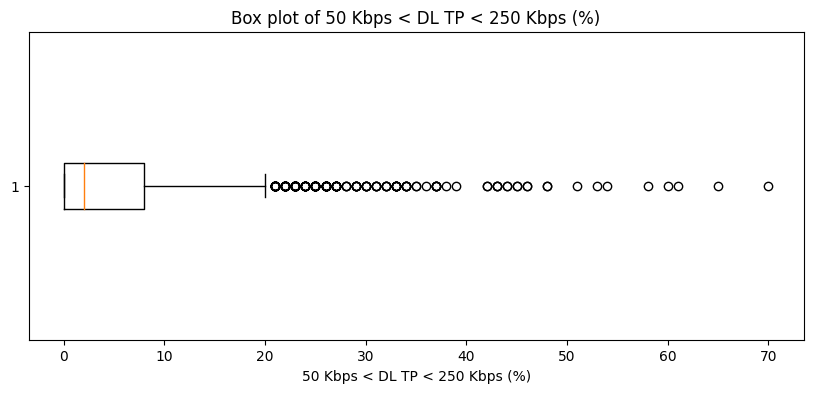

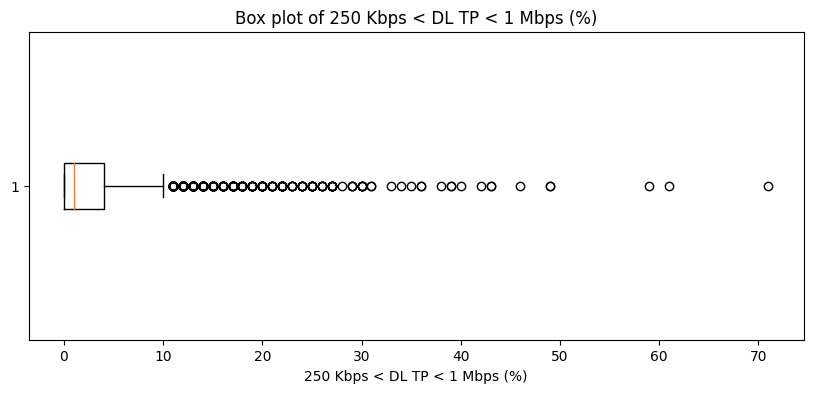

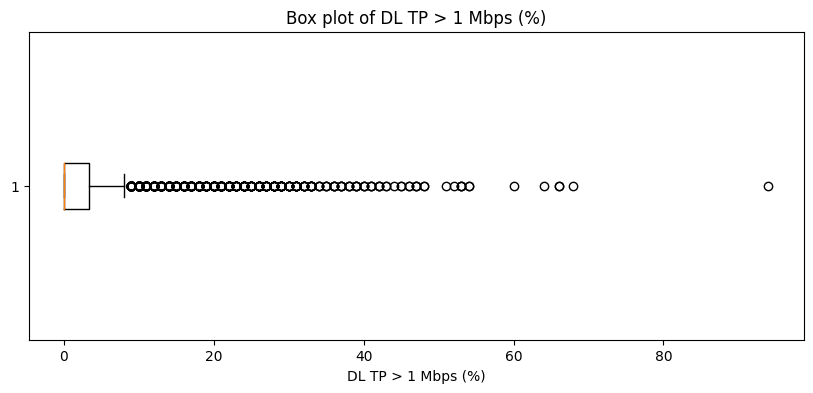

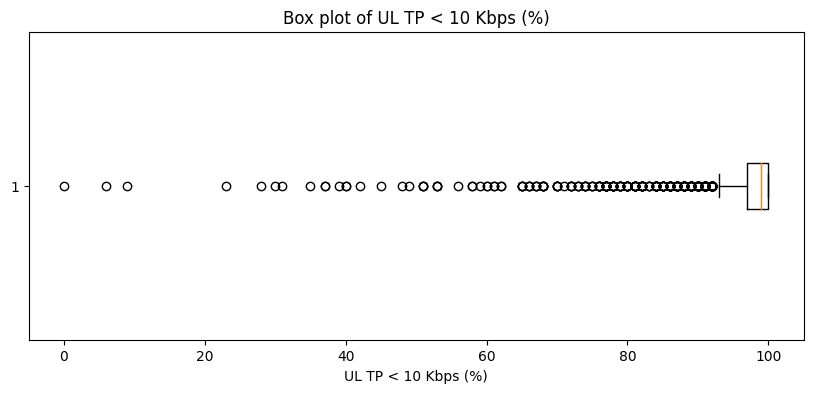

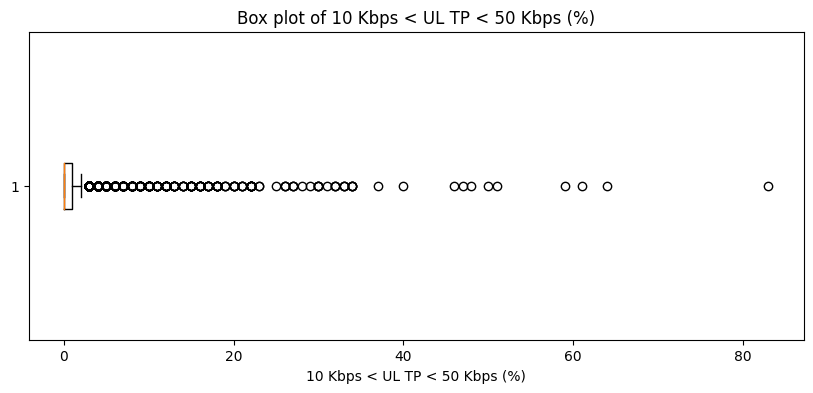

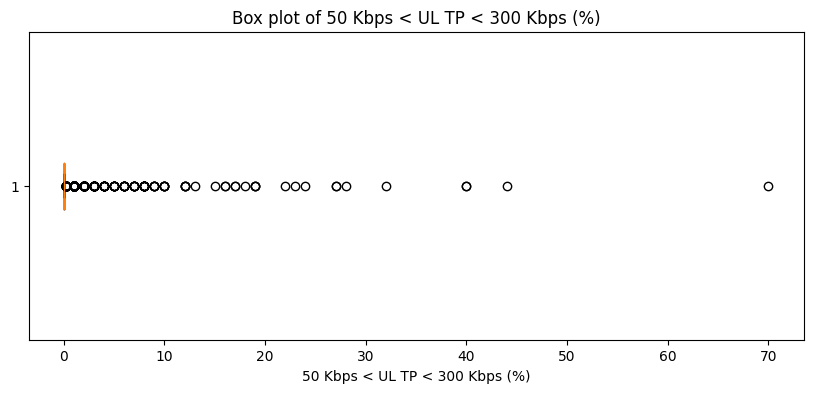

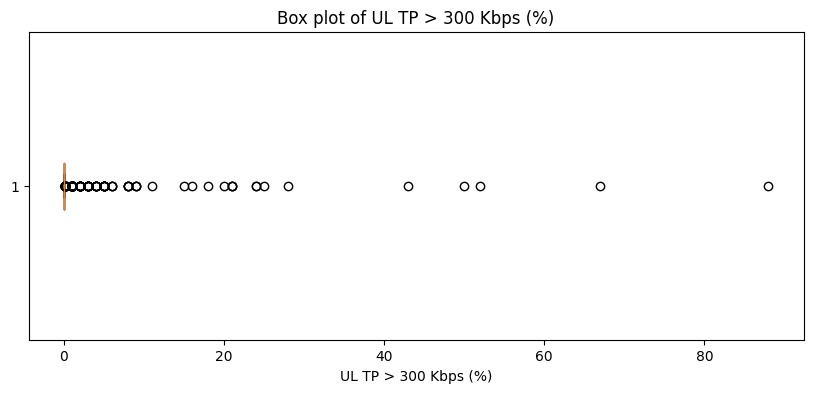

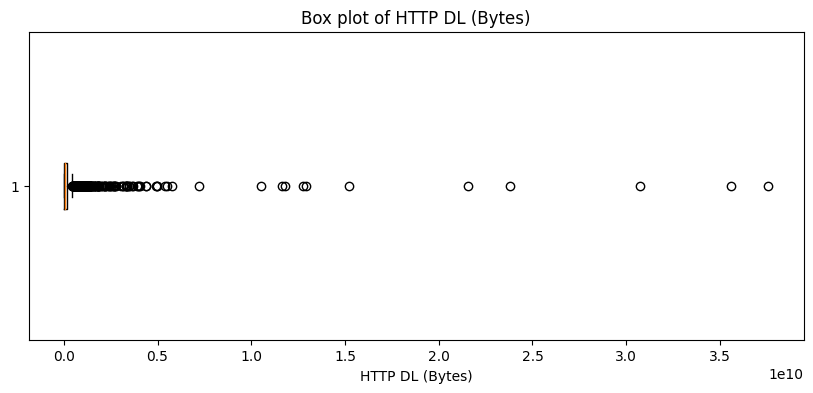

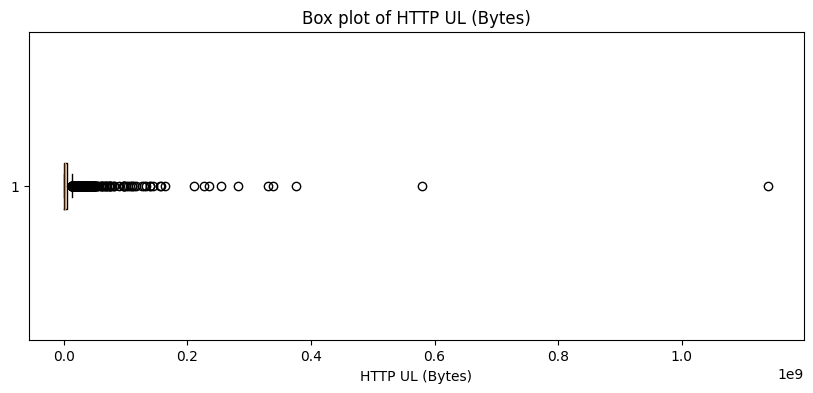

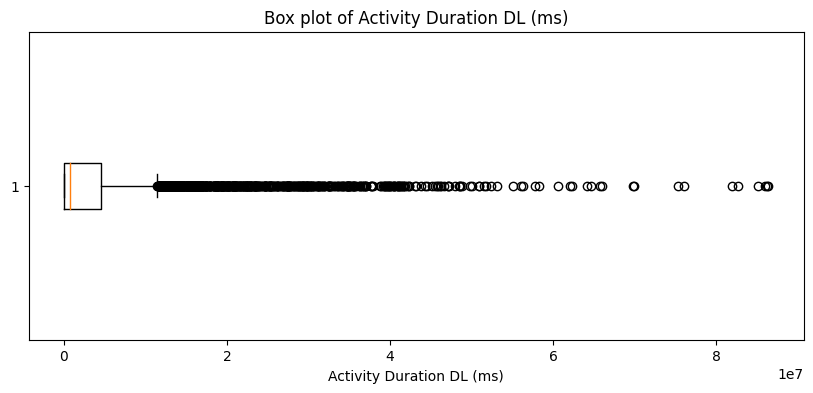

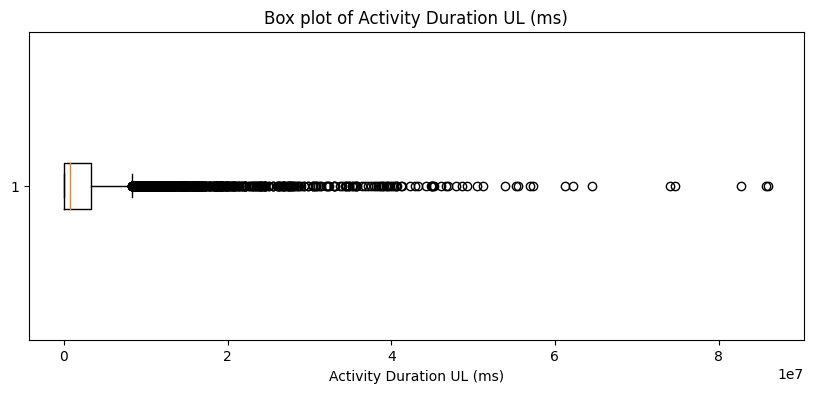

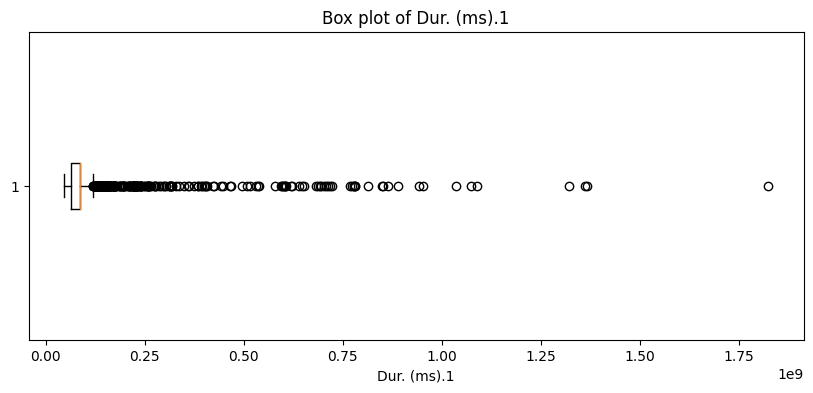

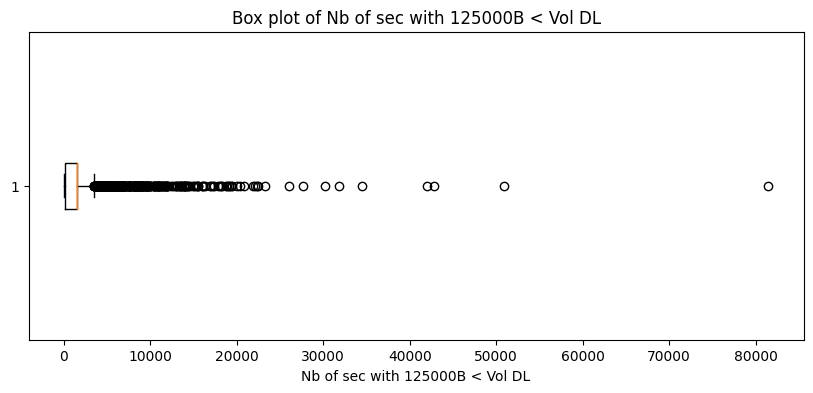

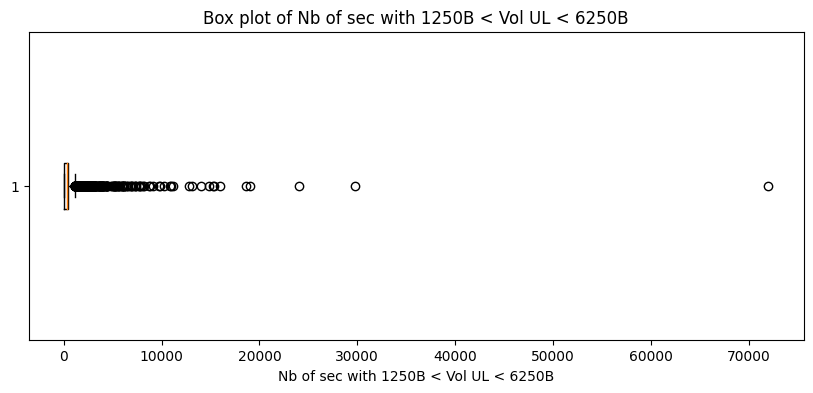

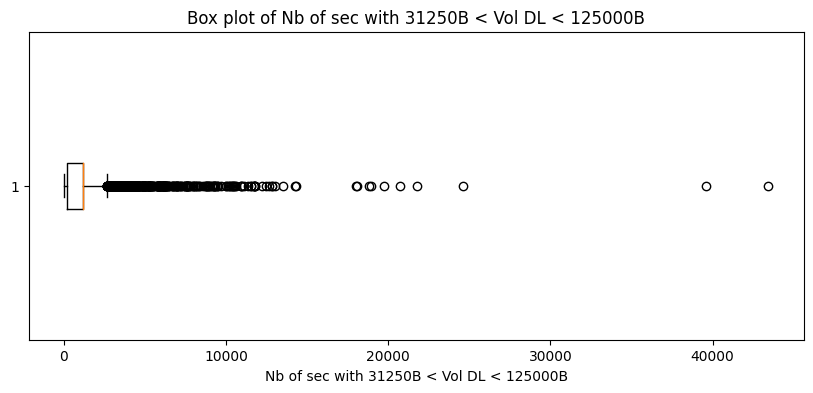

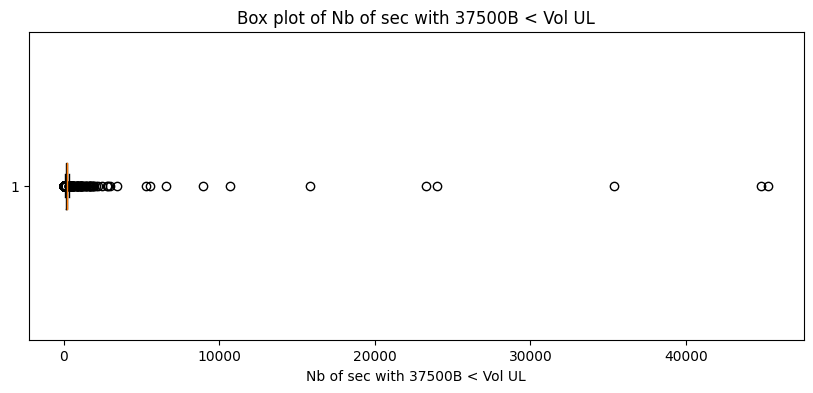

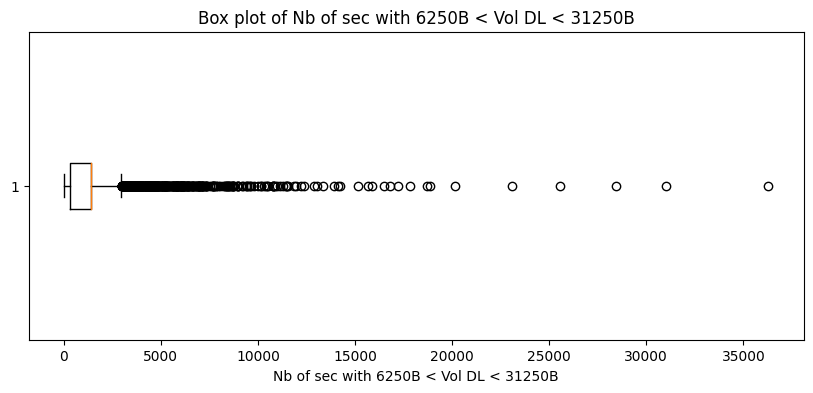

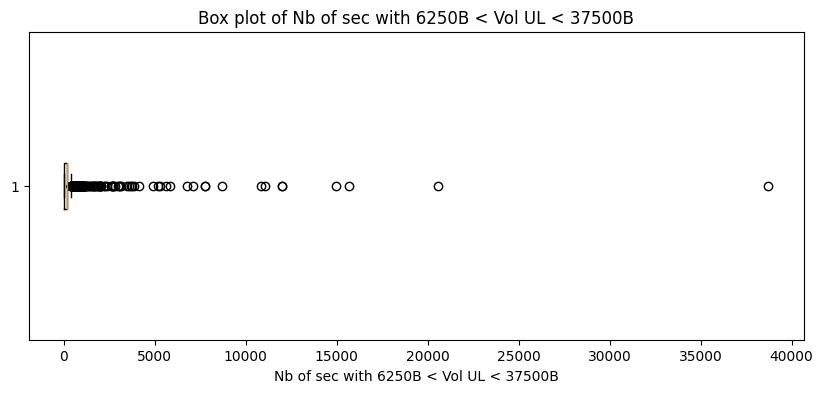

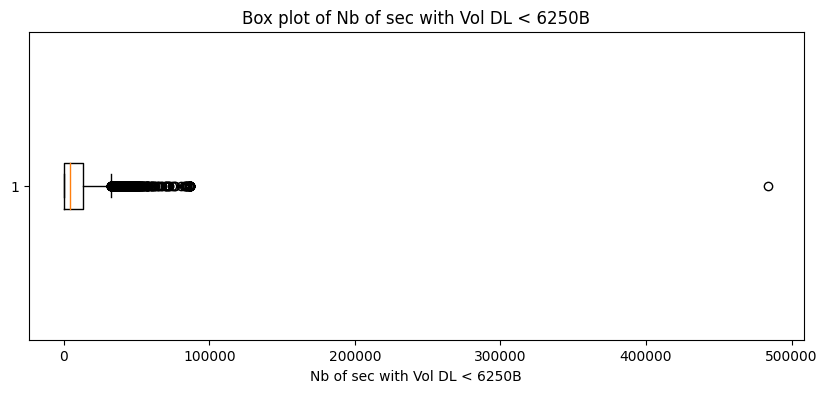

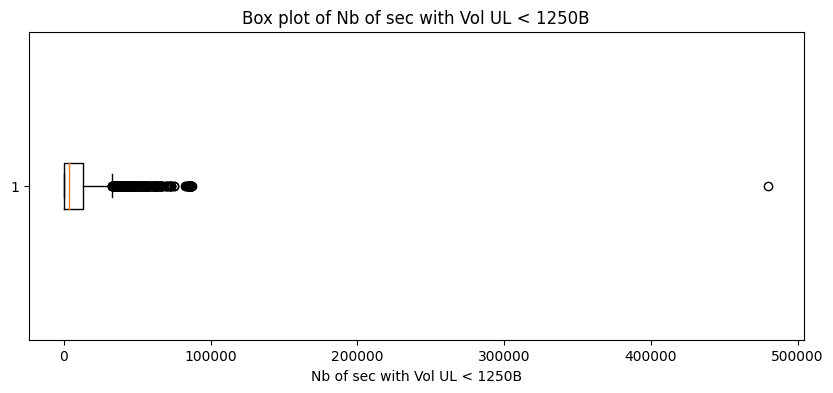

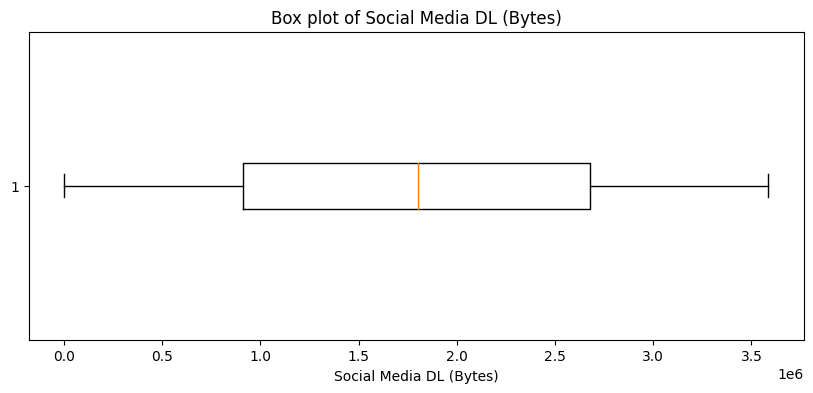

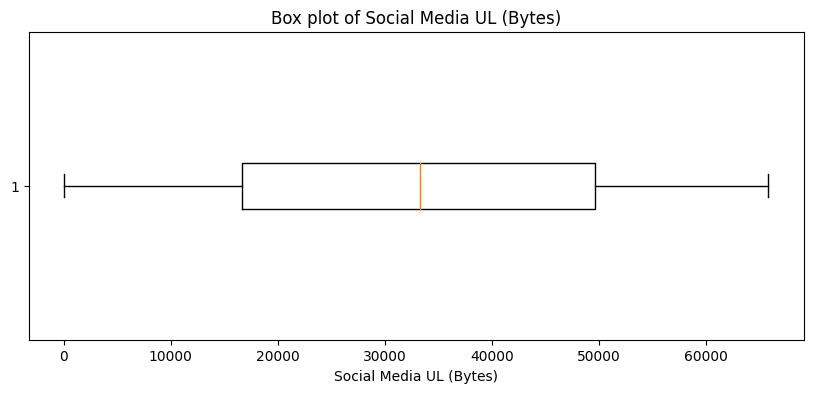

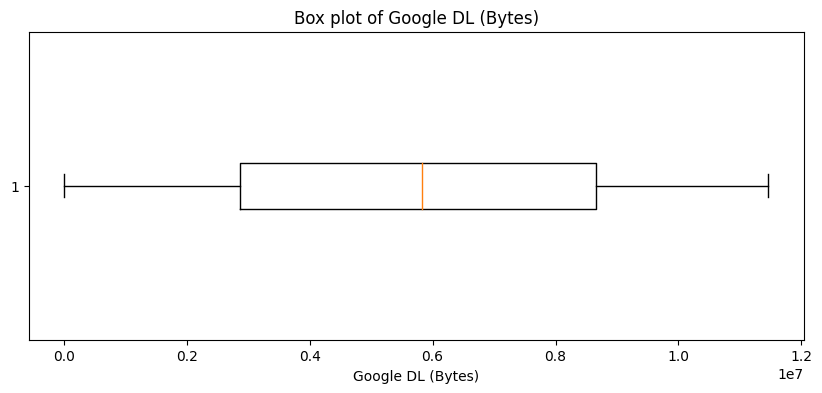

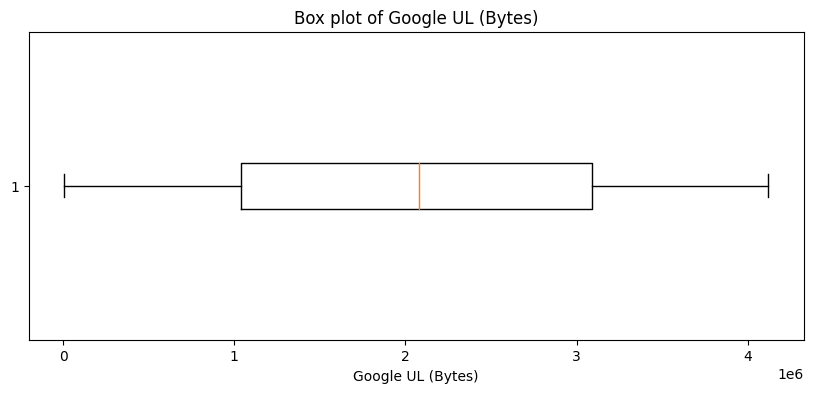

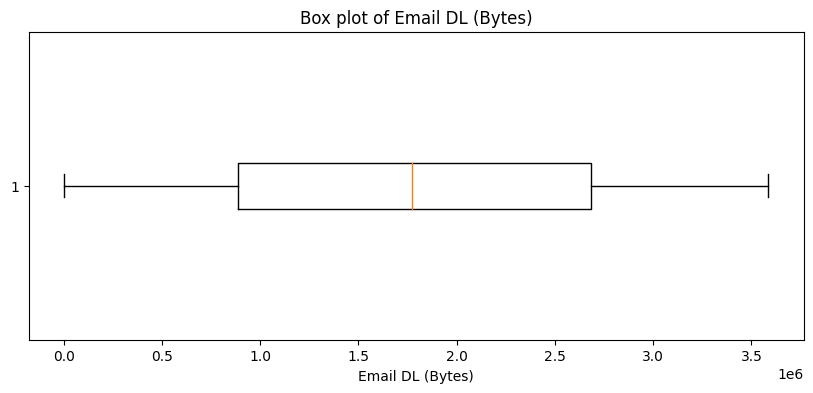

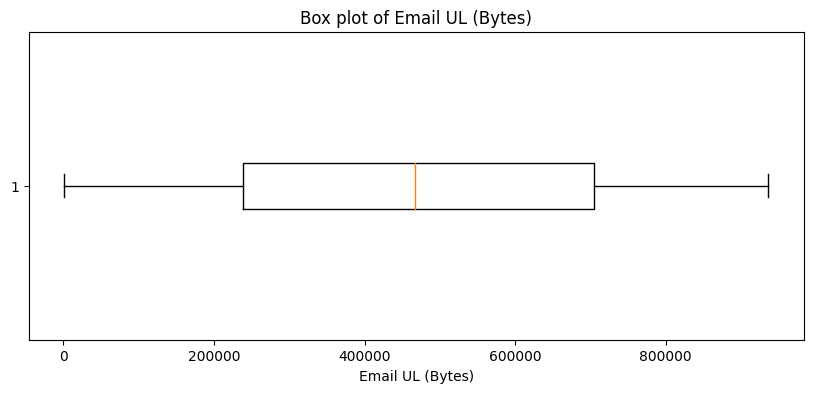

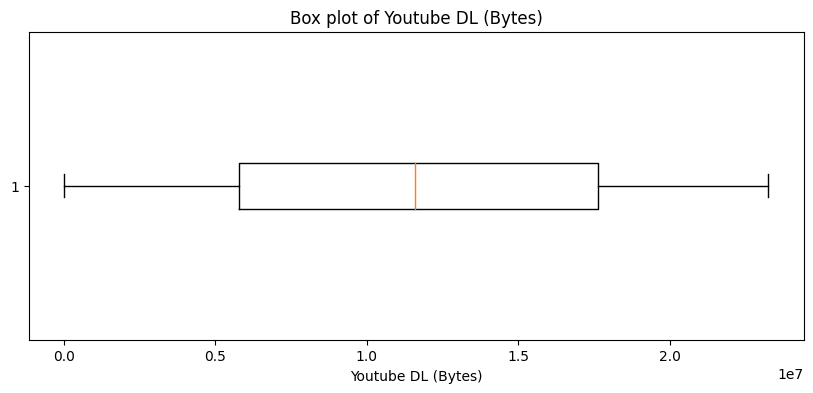

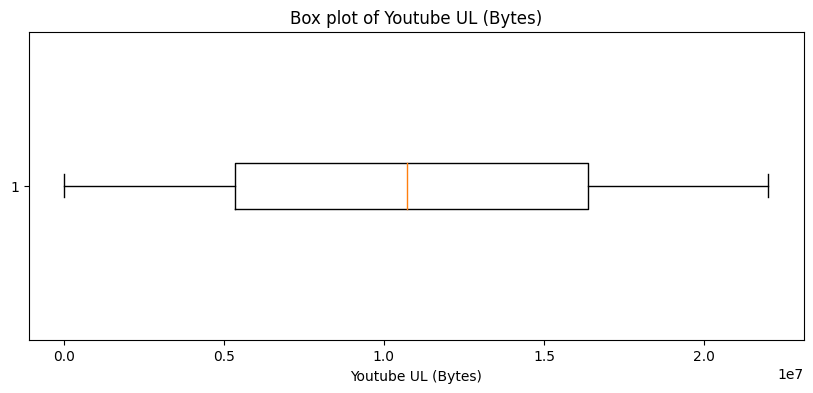

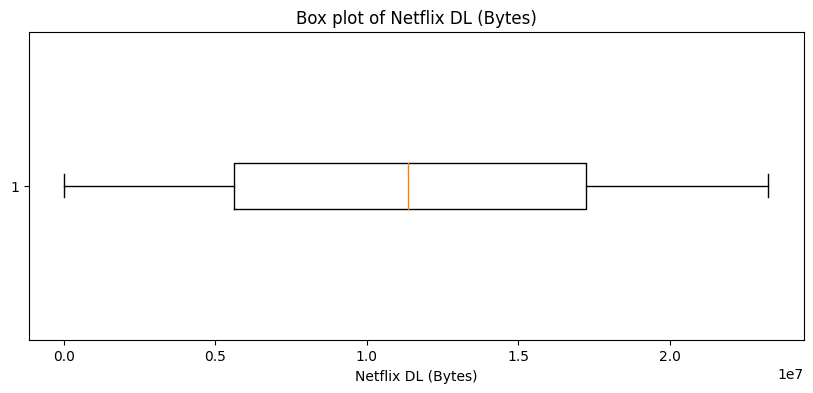

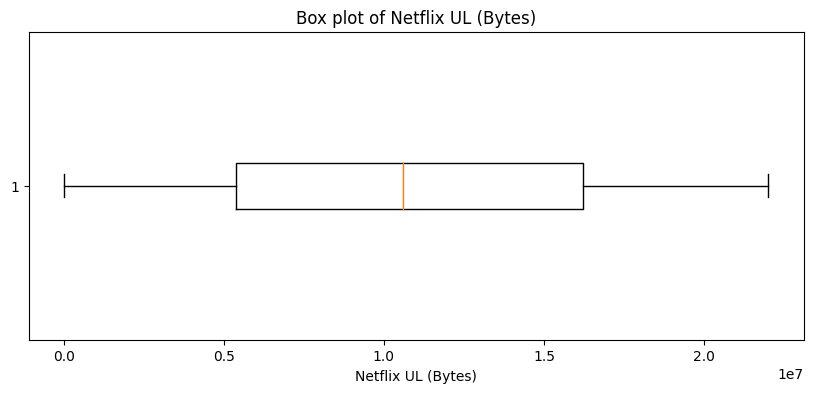

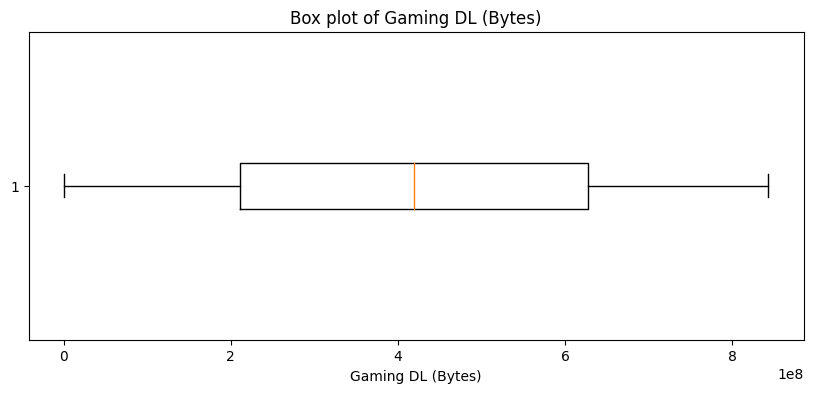

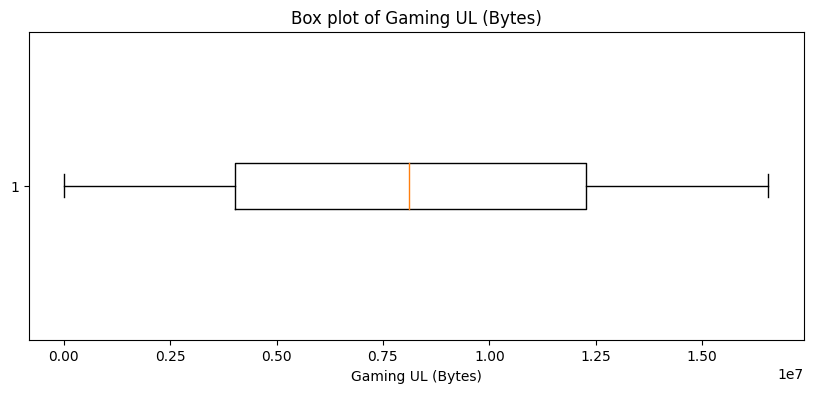

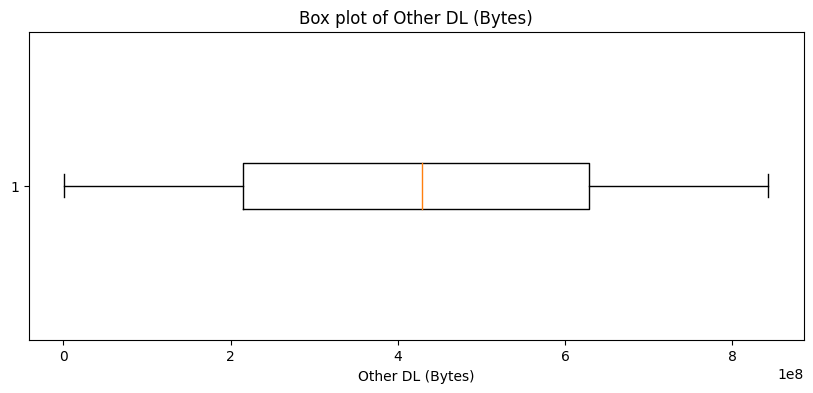

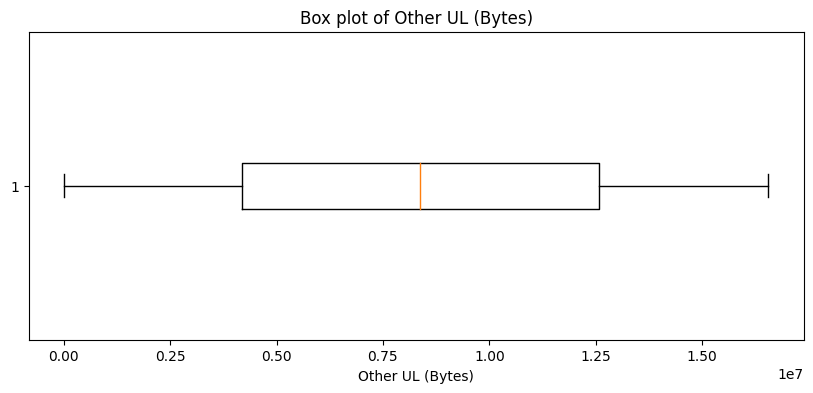

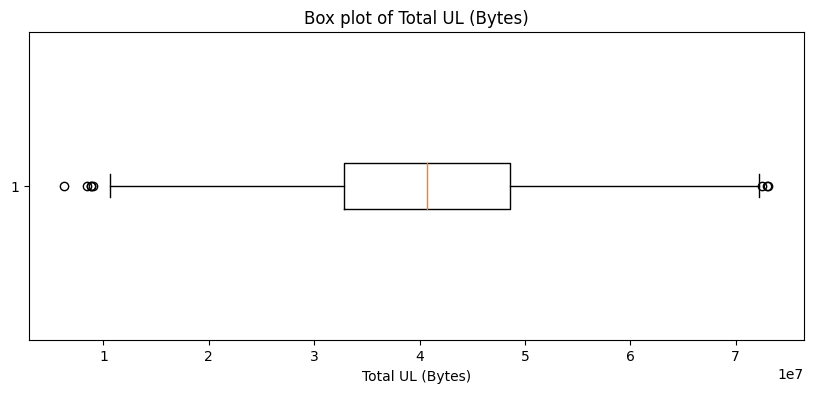

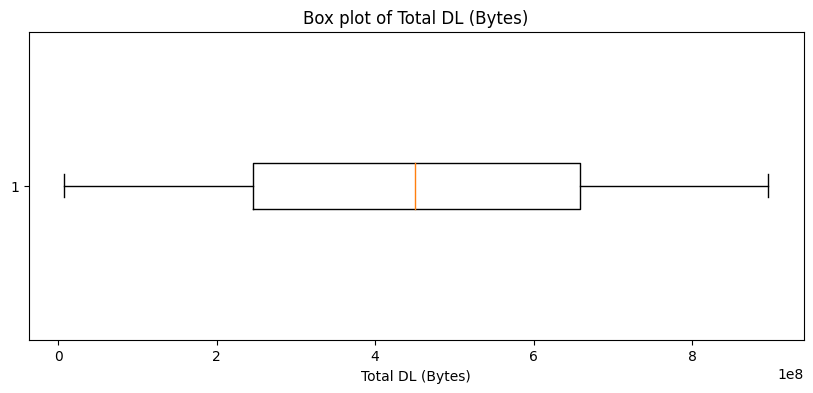

In [22]:
# Plot box plots for each numerical column
for column in numerical_list:
    plt.figure(figsize=(10, 4))
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

In [23]:
# Identify outliers using the IQR method
outliers_iqr = pd.DataFrame()

for column in numerical_list:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    outliers_iqr = pd.concat([outliers_iqr, outliers], axis=0)


In [24]:
print(f'Number of outliers detected using IQR: {outliers_iqr.shape[0]}')

Number of outliers detected using IQR: 12992


In [25]:
# Remove duplicates
outliers_iqr = outliers_iqr.drop_duplicates()

In [26]:
# Remove outliers from the original DataFrame
data_cleaned = data[~data.index.isin(outliers_iqr.index)]

In [27]:
# Count the number of removed outliers for each column
removed_outliers_count = {}
for column in numerical_list:
    initial_count = data[column].shape[0]
    final_count = data_cleaned[column].shape[0]
    removed_outliers_count[column] = initial_count - final_count


In [28]:
# Create a DataFrame with the count of removed outliers
outliers_count_df = pd.DataFrame(list(removed_outliers_count.items()), columns=['Column', 'Removed Outliers Count'])

# Transpose the outliers_count_df to include counts in a row format
outliers_count_transposed = outliers_count_df.set_index('Column').T

In [29]:
outliers_count_transposed

Column,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Removed Outliers Count,3823,3823,3823,3823,3823,3823,3823,3823,3823,3823,...,3823,3823,3823,3823,3823,3823,3823,3823,3823,3823


In [30]:
# Function to remove outliers from a column using IQR method
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5 * IQR) & (column <= Q3 + 1.5 * IQR)]

# Dictionary to store information about removed outliers
removed_outliers_info = {}

# Iterate over each numerical column
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Count rows before outlier removal
    rows_before = len(data)

    # Remove outliers from the column
    data[column] = remove_outliers(data[column])

    # Count rows after outlier removal
    rows_after = len(data)

    # Calculate number of outliers removed
    outliers_removed = rows_before - rows_after

    # Store information about removed outliers
    removed_outliers_info[column] = outliers_removed

# Display information about removed outliers
print("Outliers Removed:")
for column, removed_count in removed_outliers_info.items():
    print(f"{column}: {removed_count}")

Outliers Removed:
Bearer Id: 0
Start ms: 0
End ms: 0
Dur. (ms): 0
IMSI: 0
MSISDN/Number: 0
IMEI: 0
Avg RTT DL (ms): 0
Avg RTT UL (ms): 0
Avg Bearer TP DL (kbps): 0
Avg Bearer TP UL (kbps): 0
TCP DL Retrans. Vol (Bytes): 0
TCP UL Retrans. Vol (Bytes): 0
DL TP < 50 Kbps (%): 0
50 Kbps < DL TP < 250 Kbps (%): 0
250 Kbps < DL TP < 1 Mbps (%): 0
DL TP > 1 Mbps (%): 0
UL TP < 10 Kbps (%): 0
10 Kbps < UL TP < 50 Kbps (%): 0
50 Kbps < UL TP < 300 Kbps (%): 0
UL TP > 300 Kbps (%): 0
HTTP DL (Bytes): 0
HTTP UL (Bytes): 0
Activity Duration DL (ms): 0
Activity Duration UL (ms): 0
Dur. (ms).1: 0
Nb of sec with 125000B < Vol DL: 0
Nb of sec with 1250B < Vol UL < 6250B: 0
Nb of sec with 31250B < Vol DL < 125000B: 0
Nb of sec with 37500B < Vol UL: 0
Nb of sec with 6250B < Vol DL < 31250B: 0
Nb of sec with 6250B < Vol UL < 37500B: 0
Nb of sec with Vol DL < 6250B: 0
Nb of sec with Vol UL < 1250B: 0
Social Media DL (Bytes): 0
Social Media UL (Bytes): 0
Google DL (Bytes): 0
Google UL (Bytes): 0
Email DL (

In [31]:
# Save cleaned data to CSV
data.to_csv('cleaned_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_data.csv'.")


Cleaned data saved to 'cleaned_data.csv'.
